In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('banknote.csv')

In [3]:
ds

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
ds.shape

(1372, 5)

In [5]:
ds=pd.DataFrame(data=ds)

In [6]:
ds.shape

(1372, 5)

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
ds.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [9]:
ds.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

<AxesSubplot:>

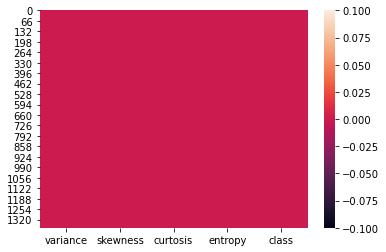

In [10]:
sns.heatmap(ds.isnull())

In [11]:
ds.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


<AxesSubplot:>

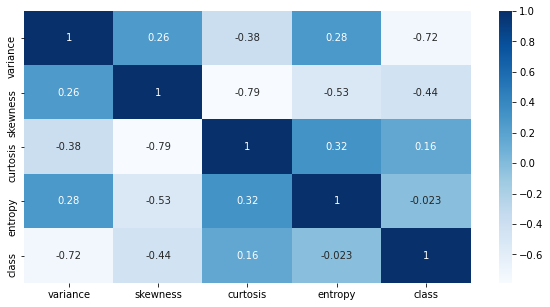

In [12]:
fig=plt.figure(figsize=(10,5))
corr=ds.corr(method='pearson')
sns.heatmap(corr,annot=True,cmap='Blues')

In [13]:
ds['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

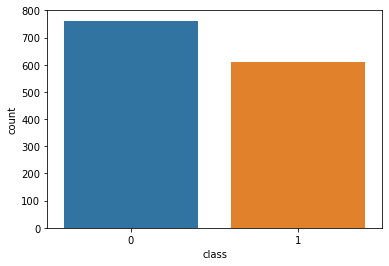

In [14]:
sns.countplot(x='class',data=ds)
plt.show()

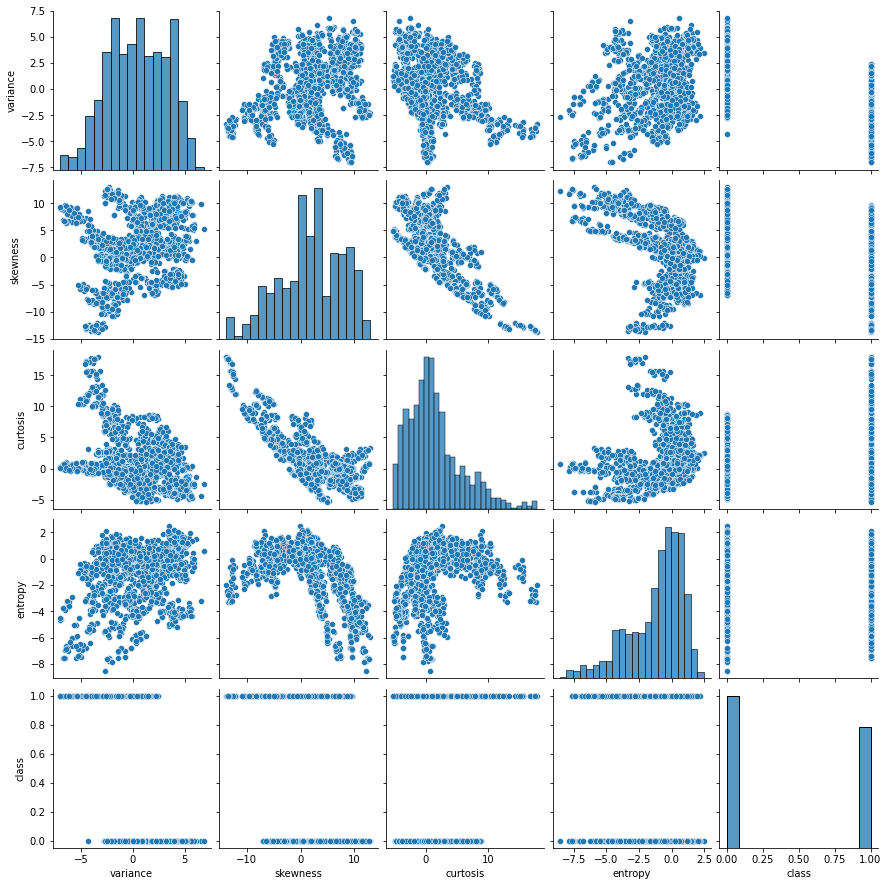

In [15]:
sns.pairplot(ds)

In [16]:
ds.skew()

variance   -0.149388
skewness   -0.394103
curtosis    1.088569
entropy    -1.022243
class       0.223191
dtype: float64

<AxesSubplot:xlabel='variance', ylabel='Count'>

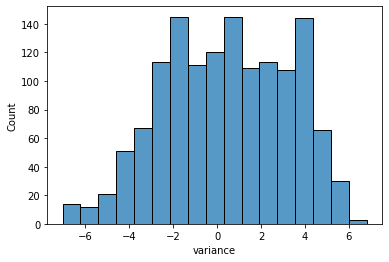

In [17]:
sns.histplot(ds['variance'])

<AxesSubplot:xlabel='skewness', ylabel='Count'>

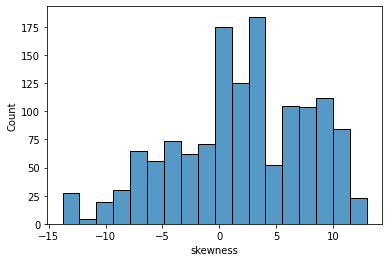

In [18]:
sns.histplot(ds['skewness'])

<AxesSubplot:xlabel='curtosis', ylabel='Count'>

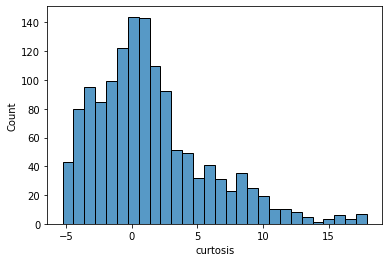

In [19]:
sns.histplot(ds['curtosis'])

<AxesSubplot:xlabel='entropy', ylabel='Count'>

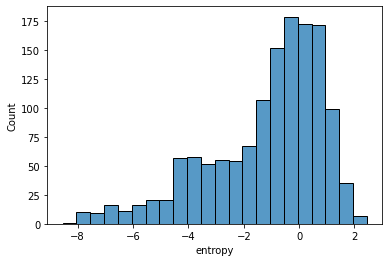

In [20]:
sns.histplot(ds['entropy'])

In [21]:
ds.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

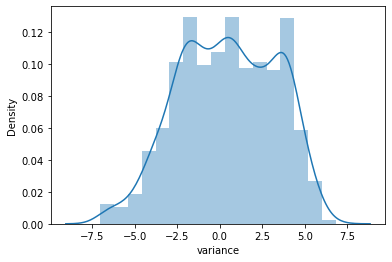

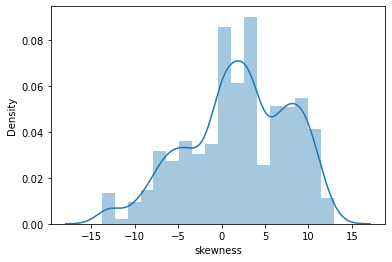

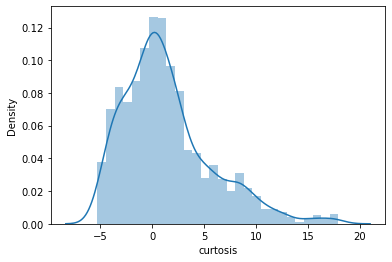

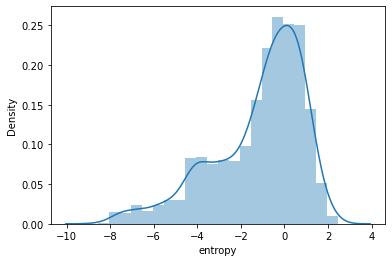

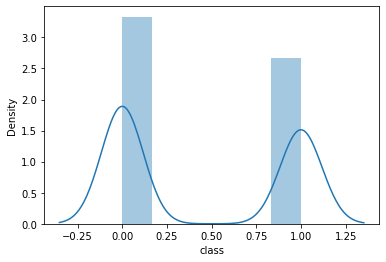

In [22]:
columns=['variance', 'skewness', 'curtosis', 'entropy', 'class']
for i in ds[columns]:
    plt.figure()
    sns.distplot(ds[i])

variance       AxesSubplot(0.125,0.125;0.133621x0.755)
skewness    AxesSubplot(0.285345,0.125;0.133621x0.755)
curtosis     AxesSubplot(0.44569,0.125;0.133621x0.755)
entropy     AxesSubplot(0.606034,0.125;0.133621x0.755)
class       AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

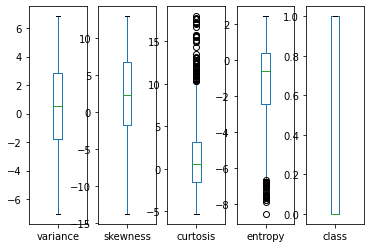

In [23]:
ds.plot(kind='box',subplots=True,layout=(1,5))

In [24]:
zscr=np.abs(zscore(ds))
threshold=3
print(np.where(zscr>3))

(array([  45,   47,  194,  202,  291,  394,  465,  529,  562,  581,  740,
        765,  820,  826,  881,  887,  942,  948,  974, 1003, 1009, 1064,
       1070, 1125, 1131, 1142, 1186, 1192, 1203, 1218, 1247, 1253, 1264,
       1308, 1314, 1369], dtype=int64), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2], dtype=int64))


In [25]:
zscr[194][3]

3.0434241775405813

In [26]:
zscr[1369][2]

3.7590174428245233

In [27]:
print("shape before removing outliers:",ds.shape)
dsnew=ds[(zscr<3).all(axis=1)]
print("shape after removing outliers",dsnew.shape)

shape before removing outliers: (1372, 5)
shape after removing outliers (1336, 5)


In [28]:
ds=dsnew

In [29]:
ds_x=ds.drop(columns=["class"])
y=ds[["class"]]
y.head()
ds_x.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [30]:
np.cbrt(-8)

-2.0

In [31]:
for i in ds_x.columns:
    if ds_x[i].skew()>0.5:
        ds_x[i]=np.cbrt(ds_x[i])
    if ds_x[i].skew()<-0.5:
        ds_x[i]=np.cbrt(ds_x[i])
ds_x.skew()

variance   -0.165024
skewness   -0.298058
curtosis   -0.144276
entropy     0.367667
dtype: float64

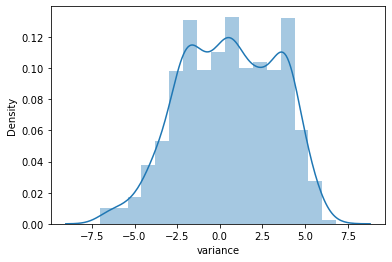

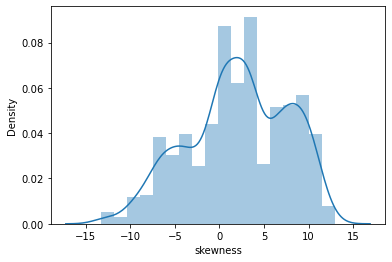

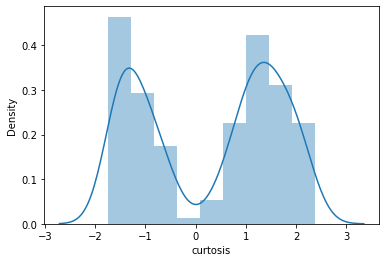

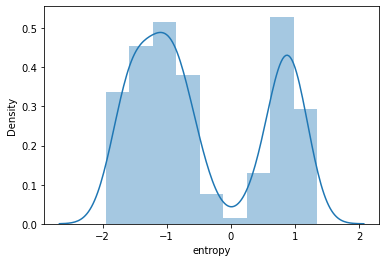

In [32]:
columns=['variance', 'skewness', 'curtosis', 'entropy']
for i in ds_x[columns]:
    plt.figure()
    sns.distplot(ds_x[i])

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_x)
x=pd.DataFrame(x,columns=ds_x.columns)
x.head()

,variance,skewness,curtosis,entropy
0,1.103540,1.186418,-1.238451,-0.308941
1,1.434725,1.097028,-1.193664,-0.672026
2,1.191111,-0.839847,0.710251,0.905149
3,1.044419,1.339977,-1.369269,-1.061029
4,-0.076142,-1.165518,1.015570,-0.536026


In [34]:
x.shape

(1336, 4)

In [35]:
y.shape

(1336, 1)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1042, 4) (294, 4) (1042, 1) (294, 1)


In [37]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy score of ",lg)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score of  LogisticRegression()
0.9863945578231292
[[162   3]
 [  1 128]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       165
           1       0.98      0.99      0.98       129

    accuracy                           0.99       294
   macro avg       0.99      0.99      0.99       294
weighted avg       0.99      0.99      0.99       294



In [38]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print("accuracy score of ",gnb)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))


accuracy score of  GaussianNB()
0.891156462585034
[[151  14]
 [ 18 111]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       165
           1       0.89      0.86      0.87       129

    accuracy                           0.89       294
   macro avg       0.89      0.89      0.89       294
weighted avg       0.89      0.89      0.89       294



In [39]:
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
print("accuracy score of ",sv)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score of  SVC()
1.0
[[165   0]
 [  0 129]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       129

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [40]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("accuracy score of ",rf)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score of  RandomForestClassifier()
0.9897959183673469
[[162   3]
 [  0 129]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       165
           1       0.98      1.00      0.99       129

    accuracy                           0.99       294
   macro avg       0.99      0.99      0.99       294
weighted avg       0.99      0.99      0.99       294



In [41]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print("accuracy score of ",ad)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score of  AdaBoostClassifier(n_estimators=100)
0.9965986394557823
[[164   1]
 [  0 129]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       165
           1       0.99      1.00      1.00       129

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [42]:
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())

[1.         1.         0.99625468 1.         1.        ]
0.9992509363295881


In [43]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())

[0.88059701 0.84644195 0.84644195 0.91011236 0.87640449]
0.8719995527978087


In [44]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.99253731 0.99625468 0.99250936 0.99625468 0.99625468]
0.9947621443345073


In [45]:
joblib.dump(rf,"bankrf.obj")
bankfile=joblib.load("bankrf.obj")
bankfile.predict(x_train)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
model=[lg,sv,gnb,rf,ad]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("accuracy score of ",m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    

accuracy score of  LogisticRegression()
0.9863945578231292
[[162   3]
 [  1 128]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       165
           1       0.98      0.99      0.98       129

    accuracy                           0.99       294
   macro avg       0.99      0.99      0.99       294
weighted avg       0.99      0.99      0.99       294

[0.99626866 0.98876404 0.98501873 0.99625468 0.99250936]
0.9917630946391636
accuracy score of  SVC()
1.0
[[165   0]
 [  0 129]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       129

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

[1.         1.         0.99625468 1.         1.        ]
0.9992509363295881
accuracy score of  GaussianNB()
0.891156462585034
[[151  14]

In [47]:
joblib.dump(sv,"svmodel.obj")

['svmodel.obj']

In [48]:
svfile=joblib.load("svmodel.obj")
svfile.predict(x_train)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)